## CNN Method on Malaria Cell Images
Malaria is a disease caused by a plasmodium parasite which is transmitted by the bite of an infected mosquito. Its severity
varies based on the species of plasmodium. 
Symptoms are chills, fever, and sweating, usually occurring a few weeks after being bitten. In severe cases it can cause 
yellow skin, seizures, coma, or death.
If not properly treated, people may have recurrences of the disease months later. In those who have recently survived an 
infection, reinfection usually causes milder symptoms. This partial resistance disappears over months to years if the person 
has no continuing exposure to malaria.

Source: wikipedia.com

The Malaria cell images dataset is taken from the official NIH website:https://ceb.nlm.nih.gov/repositories/malaria-datasets/
It has 2 folders - Infected and Uninfected. It contains total of 27,558 images

Here the goal is to predict which images are infected and which are not.

    

In [1]:
#loading necessary libraries
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os
import cv2

In [2]:
print(os.listdir(r"D:\ALY 6020 Predictive Analytics\cell_images\cell_images/"))

['Parasitized', 'Uninfected']


There are 2 folders of images named Parasitized and Uninfected

In [3]:
#Reading the data
parasitized = os.listdir(r"D:\ALY 6020 Predictive Analytics\cell_images\cell_images\Parasitized/")
uninfected = os.listdir(r"D:\ALY 6020 Predictive Analytics\cell_images\cell_images\Uninfected/")

In [4]:
#removing the thumbs.db filenames from parasitized and uninfected lists due to wrong filr extensions
parasitized.remove("Thumbs.db")
uninfected.remove("Thumbs.db")

After getting all the images, we are giving resizing all images with same pixel rates. Hence, resizing all images to 50x50

In [5]:
parasitized_images = []
for p in parasitized:
    img = Image.open(r"D:\ALY 6020 Predictive Analytics\cell_images\cell_images\Parasitized/" +p)
    img = img.resize((50,50))
    parasitized_images.append(img)

uninfected_images = []
for u in uninfected:
    img = Image.open(r"D:\ALY 6020 Predictive Analytics\cell_images\cell_images\Uninfected/" +u)
    img = img.resize((50,50))
    uninfected_images.append(img)



Some example images of parasitized and uninfected cells

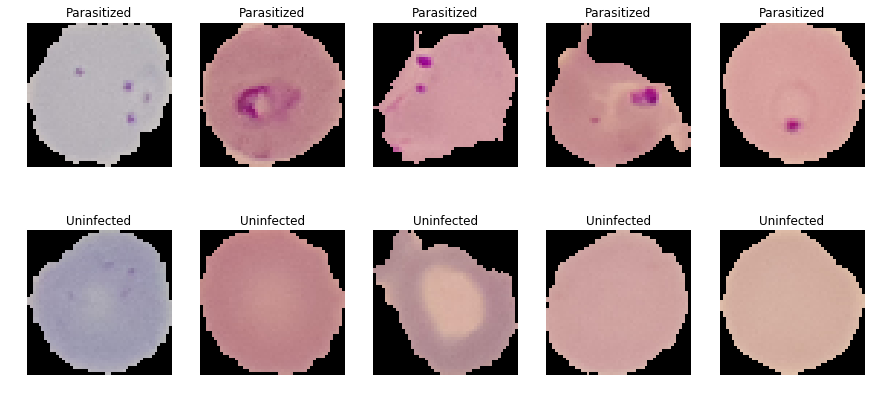

In [6]:
rndm = np.random.randint(len(parasitized_images)-1,size = 10)
plt.figure(1, figsize=(15,7))
for i in range(1,11):
        plt.subplot(2,5,i)
        if i < 6:
            plt.imshow(parasitized_images[rndm[i-1]])
            plt.axis("off")
            plt.title("Parasitized")
        else:
            plt.imshow(uninfected_images[rndm[i-1]])
            plt.axis("off")
            plt.title("Uninfected")

Now, we are creating x pixels and y class for each images. For x labels we need 
(total samples, horizontal pixel quantity, vertical pixel quantity, RGB) = (27588, 50, 50, 3)

In [7]:
x_array = np.empty((len(parasitized_images)+len(uninfected_images), 50, 50, 3))
x_array = x_array.astype(int)

Filling empty numpy arrays with image values

In [8]:
index = 0
for i in range(x_array.shape[0]):
    if i < len(parasitized_images):
        x_array[i] = np.array(parasitized_images[i])
    else:
        x_array[i] = np.array(uninfected_images[index])
        index += 1

Our y label corresponds to parasitized as 1 and uninfected as 0

In [9]:
y_array = np.append(np.ones(len(parasitized_images)), np.zeros(len(uninfected_images)))

In [10]:
from keras.utils.np_utils import to_categorical
y_array = to_categorical(y_array, num_classes = 2)

Using TensorFlow backend.


Splitting the data into training and testing 

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_array, y_array, random_state = 42, test_size = 0.1)
print("x_train shape: ",x_train.shape)
print("x_test shape: ",x_test.shape)
print("y_train shape: ",y_train.shape)
print("y_test shape: ",y_test.shape)

x_train shape:  (24802, 50, 50, 3)
x_test shape:  (2756, 50, 50, 3)
y_train shape:  (24802, 2)
y_test shape:  (2756, 2)


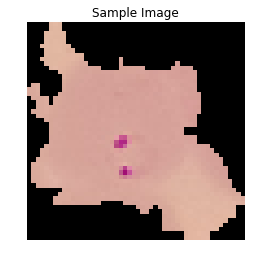

In [18]:
plt.imshow(x_train[2000])
plt.axis("off")
plt.title("Sample Image")
plt.show()

Creating CNN model with keras

In [19]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (50,50,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512, activation = "relu"))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.5))
model.add(Dense(2, activation = "softmax"))

In [27]:
model.compile(optimizer = "Adam" , loss = "categorical_crossentropy", metrics=["accuracy"])

In [28]:
history = model.fit(x_train,y_train,epochs=20, batch_size=32)

Epoch 1/20
24802/24802 [==============================] - 63s 3ms/step - loss: 0.0878 - accuracy: 0.9706
Epoch 2/20
24802/24802 [==============================] - 67s 3ms/step - loss: 0.0862 - accuracy: 0.9709
Epoch 3/20
24802/24802 [==============================] - 67s 3ms/step - loss: 0.0889 - accuracy: 0.9694
Epoch 4/20
24802/24802 [==============================] - 82s 3ms/step - loss: 0.0895 - accuracy: 0.9693
Epoch 5/20
24802/24802 [==============================] - 69s 3ms/step - loss: 0.0776 - accuracy: 0.9731
Epoch 6/20
24802/24802 [==============================] - 70s 3ms/step - loss: 0.0791 - accuracy: 0.9712
Epoch 7/20
24802/24802 [==============================] - 70s 3ms/step - loss: 0.0784 - accuracy: 0.9726
Epoch 8/20
24802/24802 [==============================] - 70s 3ms/step - loss: 0.0762 - accuracy: 0.9725
Epoch 9/20
24802/24802 [==============================] - 70s 3ms/step - loss: 0.0799 - accuracy: 0.9721
Epoch 10/20
24802/24802 [==============================

After training the model, now it's time to test the model

In [30]:
print("Test accuracy: {} %".format(round(model.evaluate(x_test,y_test)[1]*100,2)))

2756/2756 [==============================] - 1s 490us/step
Test accuracy: 96.26 %


Hence, we got our test accuracy of 96% which indicates that our CNN method was successful. CNN is considered to be a better 
method when processing images.